# ER-Deceleration Curve

---

# 1 ER-Decel Curve

The ER-deceleration curve is generated from literature with laboratory measuremnt results. We update the dataset via meta-analysis based on the framework of MOVES. All curve parameters and literature are stored in the `BWETool` class which provides toolkits for:  
1. Braking detection;
2. OpMode recognition;
3. ER calculation.

In [2]:
# initialize a BWETool object
from emission import BWETool
BWE = BWETool()

## 1.1 Low Metallic

In [2]:
BWE.ER.LM_PM10_ERs

,Material,Decel[m/s2],PM10ER[g/hr],"Author, Year"
0,LM,0.97,2.822870,"Liu et al., 2022"
1,LM,1.07,1.490094,"Farwick Zum Hagen et al., 2019"
2,LM,1.07,3.515094,"Farwick Zum Hagen et al., 2019"
3,LM,1.20,5.520000,"Sanders et al., 2003"
4,LM,1.20,5.600000,"Sanders et al., 2003"
5,LM,2.57,0.574110,"Kim et al., 2020"
6,LM,2.84,88.241563,"Perricone et al., 2018"
7,LM,2.84,31.651865,"Perricone et al., 2018"
8,LM,2.84,64.262877,"Perricone et al., 2018"
9,LM,7.90,1481.142857,"Sanders et al., 2003"


In [4]:
BWE.ER.LM_POW_PARAM

array([1.69876055, 3.27584605])

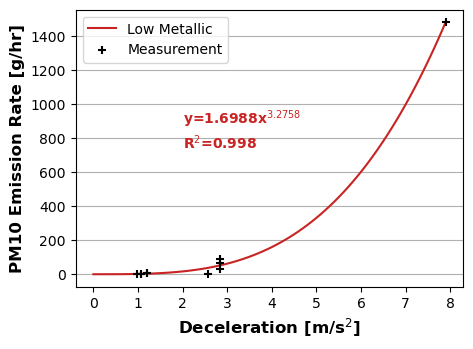

In [3]:
BWE.ER.plotERCurve("LM")

## 1.2 NAO

In [5]:
BWE.ER.NAO_PM10_ERs

,Material,Decel[m/s2],PM10ER[g/hr],"Author, Year"
10,NAO,0.30,0.033654,"Woo et al., 2021"
11,NAO,0.82,0.062070,"Woo et al., 2021"
12,NAO,0.97,0.087106,"Woo et al., 2021"
13,NAO,1.07,0.197915,"Woo et al., 2021"
14,NAO,0.97,2.661564,"Grigoratos et al., 2023"
15,NAO,0.97,4.718226,"Storch et al., 2023"
16,NAO,1.00,0.144072,"Iijima et al., 2008"
17,NAO,1.20,0.900000,"Sanders et al., 2003"
18,NAO,1.20,1.200000,"Sanders et al., 2003"
19,NAO,2.57,0.249086,"Woo et al., 2021"


In [6]:
BWE.ER.NAO_POW_PARAM

array([0.02188477, 5.20007439])

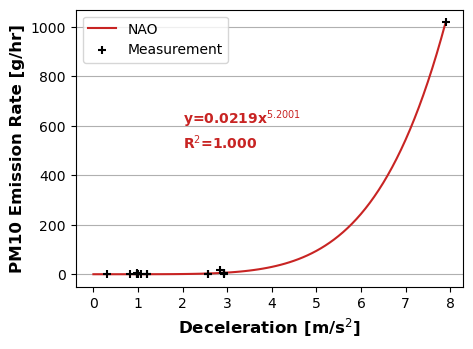

In [7]:
BWE.ER.plotERCurve("NAO")

## 1.3 Semi-metallic

In [12]:
BWE.ER.SM_PM10_ERs

,Material,Decel[m/s2],PM10ER[g/hr],"Author, Year"
26,SM,1.20,1.360000,"Sanders et al., 2003"
27,SM,2.94,4.251064,"Garg et al., 2000"
28,SM,2.94,1.884255,"Garg et al., 2000"
29,SM,7.90,944.228571,"Sanders et al., 2003"


In [11]:
BWE.ER.SM_POW_PARAM

array([0.00594554, 5.79403807])

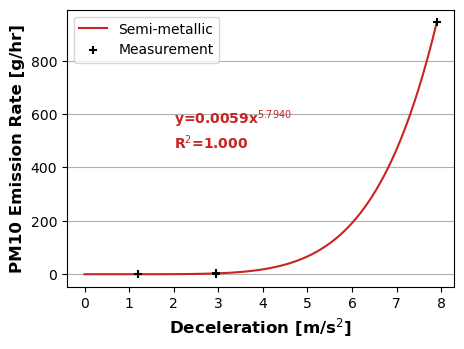

In [10]:
BWE.ER.plotERCurve("SM")

# 2 Comparison with MOVES

In [1]:
import matplotlib.pyplot as plt

# font
plt.rcParams['font.sans-serif'] = ['Arial']
LABEL_FONT = {
    "fontsize": 12,
    "weight": "bold",
}    

# colors
BLUE = '#2878B5'
LIGHTBLUE = '#9AC9DB'
ORANGE = '#F8AC8C'
RED = '#C82423'
PINK = '#FF8884'
GREY = '#9E9E9E'
DEEPGREEN = '#32B897'
GREEN = '#96CCCB'

plt.rcParams['figure.dpi'] = 300

In [3]:
# initialize a BWETool object
from emission import BWETool
BWE = BWETool()

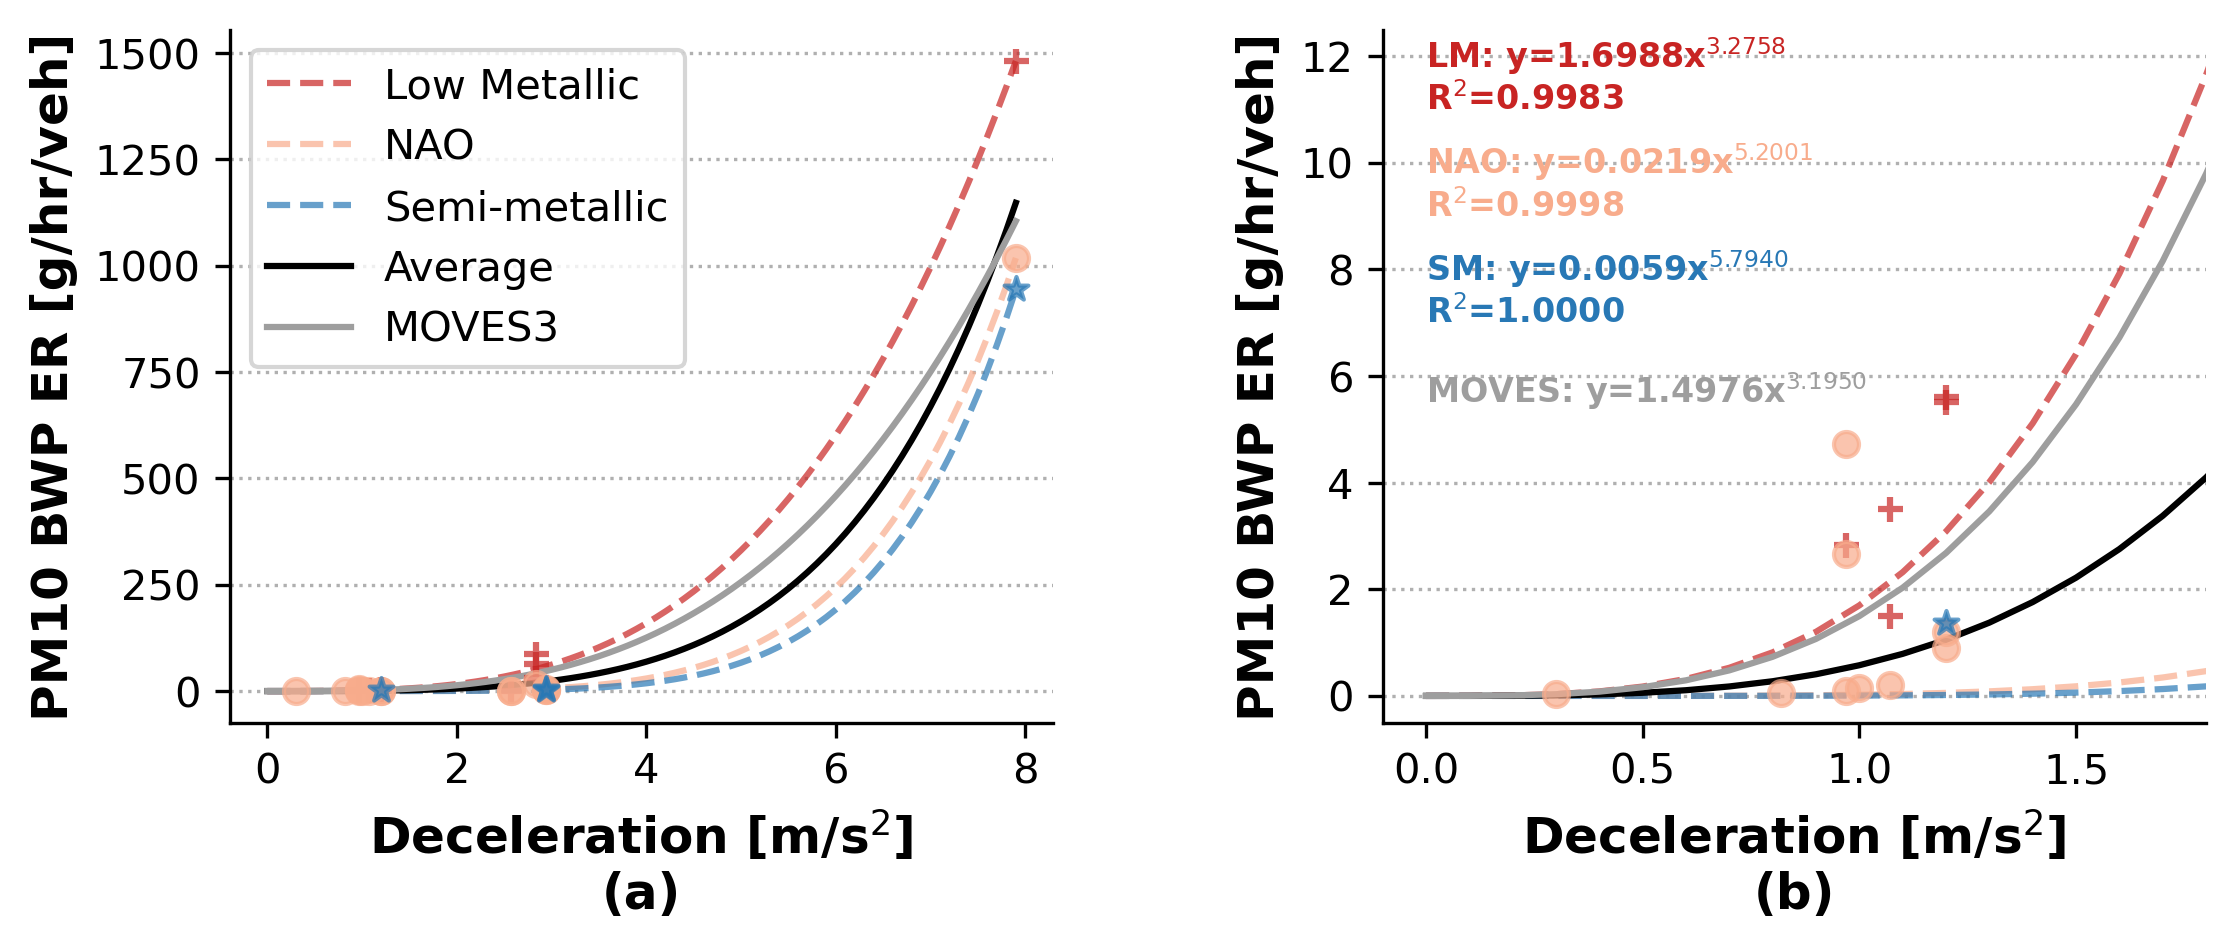

In [4]:
# comparison
fig, ax = plt.subplots(1, 2, figsize=(8.5,3))

decel = np.arange(0, 8, 0.1)
text_x, text_y, interval = 0, 11, 2
alpha = 0.7
LM_color, NAO_color, SM_color = RED, ORANGE, BLUE

# Low-M
pred_pow = BWE.ER.calER(decel, "LM")
ax[0].plot(decel, pred_pow, color=LM_color, linestyle='--', label="Low Metallic", alpha=alpha, zorder=10)
ax[0].scatter(BWE.ER.LM_PM10_ERs['Decel[m/s2]'], BWE.ER.LM_PM10_ERs['PM10ER[g/hr]'], color=LM_color, marker="+", alpha=alpha, zorder=20)
ax[1].plot(decel, pred_pow, color=LM_color, linestyle='--', label="Low Metallic", alpha=alpha, zorder=10)
ax[1].scatter(BWE.ER.LM_PM10_ERs['Decel[m/s2]'], BWE.ER.LM_PM10_ERs['PM10ER[g/hr]'], color=LM_color, marker="+", alpha=alpha, zorder=20)

# NAO
pred_pow = BWE.ER.calER(decel, "NAO")
ax[0].plot(decel, pred_pow, color=NAO_color, linestyle='--', alpha=alpha, label="NAO", zorder=10)
ax[0].scatter(BWE.ER.NAO_PM10_ERs['Decel[m/s2]'], BWE.ER.NAO_PM10_ERs['PM10ER[g/hr]'], color=NAO_color, marker="o", alpha=alpha, zorder=20)
ax[1].plot(decel, pred_pow, color=NAO_color, linestyle='--', alpha=alpha, label="NAO", zorder=10)
ax[1].scatter(BWE.ER.NAO_PM10_ERs['Decel[m/s2]'], BWE.ER.NAO_PM10_ERs['PM10ER[g/hr]'], color=NAO_color, marker="o", alpha=alpha, zorder=20)

# Semi-M
pred_pow = BWE.ER.calER(decel, "SM")
ax[0].plot(decel, pred_pow, color=SM_color, linestyle='--', alpha=alpha, label="Semi-metallic", zorder=10)
ax[0].scatter(BWE.ER.SM_PM10_ERs['Decel[m/s2]'], BWE.ER.SM_PM10_ERs['PM10ER[g/hr]'], color=SM_color, marker="*", alpha=alpha, zorder=20)
ax[1].plot(decel, pred_pow, color=SM_color, linestyle='--', alpha=alpha, label="Semi-metallic", zorder=10)
ax[1].scatter(BWE.ER.SM_PM10_ERs['Decel[m/s2]'], BWE.ER.SM_PM10_ERs['PM10ER[g/hr]'], color=SM_color, marker="*", alpha=alpha, zorder=20)

# Average
pred_pow = BWE.ER.calER(decel, "avg")
ax[0].plot(decel, pred_pow, color='k', label="Average", zorder=10)
ax[1].plot(decel, pred_pow, color='k', label="Average", zorder=10)

# MOVES
pred_pow = BWE.ER.calER(decel, "MOVES")
ax[0].plot(decel, pred_pow, color=GREY, label="MOVES3", zorder=10)
ax[1].plot(decel, pred_pow, color=GREY, label="MOVES3", zorder=10)

# rectangle
Rectangle((0, -10), width=1.5, height=20)

# axis label
ax[0].set_xlabel("Deceleration [m/s$^2$]\n(a)", fontdict=LABEL_FONT)
ax[0].set_ylabel("PM10 BWP ER [g/hr/veh]", fontdict=LABEL_FONT)
ax[0].grid(axis='y', linestyle=':', zorder=0)
ax[0].legend()
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

# zoom in
ax[1].set_xlim(-0.1,1.8)
ax[1].set_ylim(-0.5,12.5)
ax[1].grid(axis='y', linestyle=':', zorder=0)
ax[1].set_xlabel("Deceleration [m/s$^2$]\n(b)", fontdict=LABEL_FONT)
ax[1].set_ylabel("PM10 BWP ER [g/hr/veh]", fontdict=LABEL_FONT)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

#text
ax[1].text(text_x, text_y, "LM: y=%.4fx$^{%.4f}$"%tuple(BWE.ER.LM_POW_PARAM) + "\nR$^2$=%.4f"%BWE.ER.LM_POW_SCORE, fontsize=8, color=LM_color, weight="bold")
ax[1].text(text_x, text_y-interval, "NAO: y=%.4fx$^{%.4f}$"%tuple(BWE.ER.NAO_POW_PARAM) + "\nR$^2$=%.4f"%BWE.ER.NAO_POW_SCORE, fontsize=8, color=NAO_color, weight="bold")
ax[1].text(text_x, text_y-interval*2, "SM: y=%.4fx$^{%.4f}$"%tuple(BWE.ER.SM_POW_PARAM) + "\nR$^2$=%.4f"%BWE.ER.SM_POW_SCORE, fontsize=8, color=SM_color, weight="bold")
ax[1].text(text_x, text_y-interval*2.75, "MOVES: y=%.4fx$^{%.4f}$"%tuple(BWE.ER.MOVES_POW_PARAM), fontsize=8, color=GREY, weight="bold")

plt.subplots_adjust(wspace=0.4)
plt.show()